<a href="https://colab.research.google.com/github/hassanme/FUTURE_ML_01/blob/main/KNN_letter_Recognition_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

# **We Fetch the Data set**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# data (as pandas dataframes)
X = letter_recognition.data.features
y = letter_recognition.data.targets

# metadata
print(letter_recognition.metadata)

# variable information
print(letter_recognition.variables)


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

**Here is the basic Information on letter Recognition Dataset**

In [ ]:
X

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x-box   20000 non-null  int64
 1   y-box   20000 non-null  int64
 2   width   20000 non-null  int64
 3   high    20000 non-null  int64
 4   onpix   20000 non-null  int64
 5   x-bar   20000 non-null  int64
 6   y-bar   20000 non-null  int64
 7   x2bar   20000 non-null  int64
 8   y2bar   20000 non-null  int64
 9   xybar   20000 non-null  int64
 10  x2ybr   20000 non-null  int64
 11  xy2br   20000 non-null  int64
 12  x-ege   20000 non-null  int64
 13  xegvy   20000 non-null  int64
 14  y-ege   20000 non-null  int64
 15  yegvx   20000 non-null  int64
dtypes: int64(16)
memory usage: 2.4 MB


In [ ]:
X.info

<bound method DataFrame.info of        x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0          2      8      3     5      1      8     13      0      6      6   
1          5     12      3     7      2     10      5      5      4     13   
2          4     11      6     8      6     10      6      2      6     10   
3          7     11      6     6      3      5      9      4      6      4   
4          2      1      3     1      1      8      6      6      6      6   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
19995      2      2      3     3      2      7      7      7      6      6   
19996      7     10      8     8      4      4      8      6      9     12   
19997      6      9      6     7      5      6     11      3      7     11   
19998      2      3      4     2      1      8      7      2      6     10   
19999      4      9      6     6      2      9      5      3      1      8   

       x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0         10      8      0      8      0      8  
1          3      9      2      8      4     10  
2          3      7      3      7      3      9  
3          4     10      6     10      2      8  
4          5      9      1      7      5     10  
...      ...    ...    ...    ...    ...    ...  
19995      6      4      2      8      3      7  
19996      9     13      2      9      3      7  
19997      9      5      2     12      2      4  
19998      6      8      1      9      5      8  
19999      1      8      2      7      2      8  

[20000 rows x 16 columns]>

In [ ]:
letter_recognition.variables

,name,role,type,demographic,description,units,missing_values
0,lettr,Target,Categorical,None,capital letter,None,no
1,x-box,Feature,Integer,None,horizontal position of box,None,no
2,y-box,Feature,Integer,None,vertical position of box,None,no
3,width,Feature,Integer,None,width of box,None,no
4,high,Feature,Integer,None,height of box,None,no
5,onpix,Feature,Integer,None,total # on pixels,None,no
6,x-bar,Feature,Integer,None,mean x of on pixels in box,None,no
7,y-bar,Feature,Integer,None,mean y of on pixels in box,None,no
8,x2bar,Feature,Integer,None,mean x variance,None,no
9,y2bar,Feature,Integer,None,mean y variance,None,no


In [ ]:
letter_recognition.data.features

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
letter_recognition.data.targets

,lettr
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [ ]:
letter_recognition.data.all

In [ ]:
letter_recognition.data.features.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
letter_recognition.data.targets.head()

,lettr
0,T
1,I
2,D
3,N
4,G


In [ ]:
letter_recognition.data.features.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [ ]:
letter_recognition.data.targets.describe()

,lettr
count,20000
unique,26
top,U
freq,813


In [ ]:
letter_recognition.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x-box   20000 non-null  int64
 1   y-box   20000 non-null  int64
 2   width   20000 non-null  int64
 3   high    20000 non-null  int64
 4   onpix   20000 non-null  int64
 5   x-bar   20000 non-null  int64
 6   y-bar   20000 non-null  int64
 7   x2bar   20000 non-null  int64
 8   y2bar   20000 non-null  int64
 9   xybar   20000 non-null  int64
 10  x2ybr   20000 non-null  int64
 11  xy2br   20000 non-null  int64
 12  x-ege   20000 non-null  int64
 13  xegvy   20000 non-null  int64
 14  y-ege   20000 non-null  int64
 15  yegvx   20000 non-null  int64
dtypes: int64(16)
memory usage: 2.4 MB


In [ ]:
letter_recognition.data.targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [ ]:
letter_recognition.data.features.isnull().sum()

,0
x-box,0
y-box,0
width,0
high,0
onpix,0
x-bar,0
y-bar,0
x2bar,0
y2bar,0
xybar,0


In [ ]:
letter_recognition.data.targets.isnull().sum()

,0
lettr,0


In [ ]:
letter_recognition.data.features.shape

(20000, 16)

In [ ]:
# Encode target labels (if necessary)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt



label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Encode labels as integers

# Split the dataset into training and testing sets (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Evaluating KNN with Cross-Validation for Different Distance Metrics:


Evaluating KNN with Euclidean distance metric:

K=1: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=2: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=3: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=4: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=5: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=6: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=7: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=8: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=9: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=10: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95

Evaluating KNN with Manhattan distance metric:

K=1: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=2: Accuracy=0.94, Precision=0.95, Recall=0.94, F1 Score=0.94
K=3: Accuracy=0.95, Precision=0.96, Recall=0.95, F1 Score=0.95
K=4: Accura

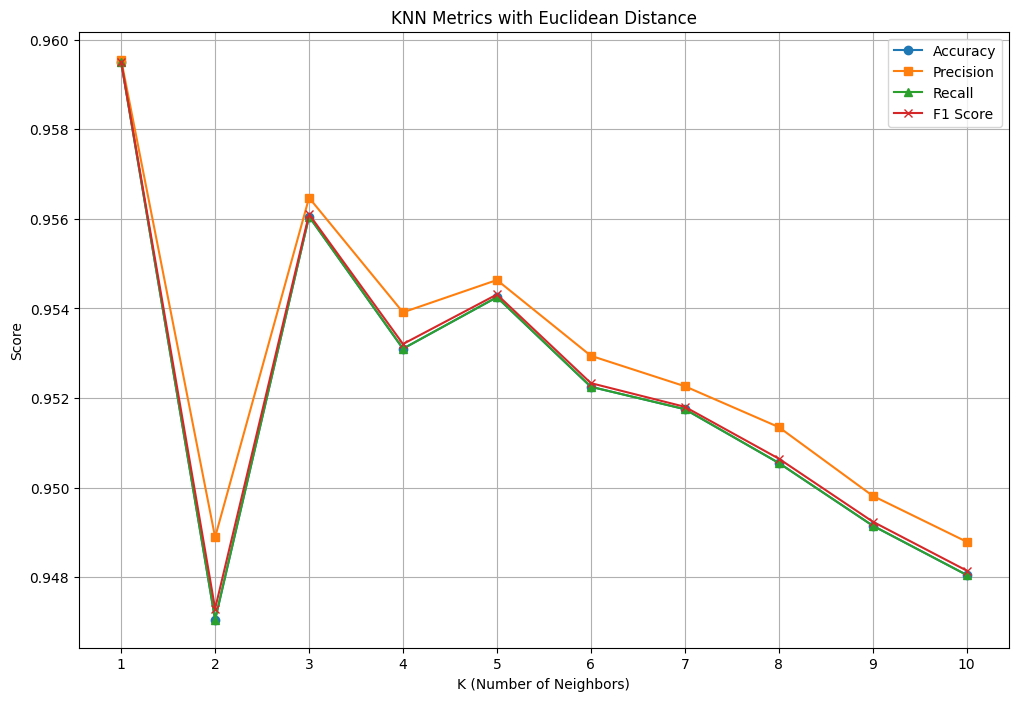

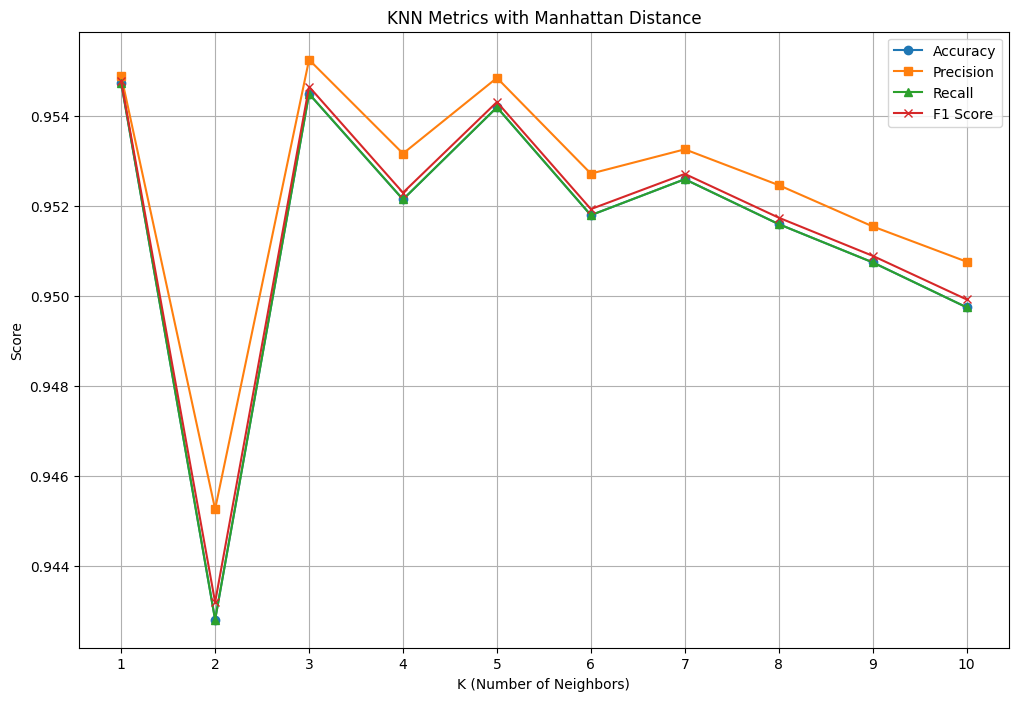

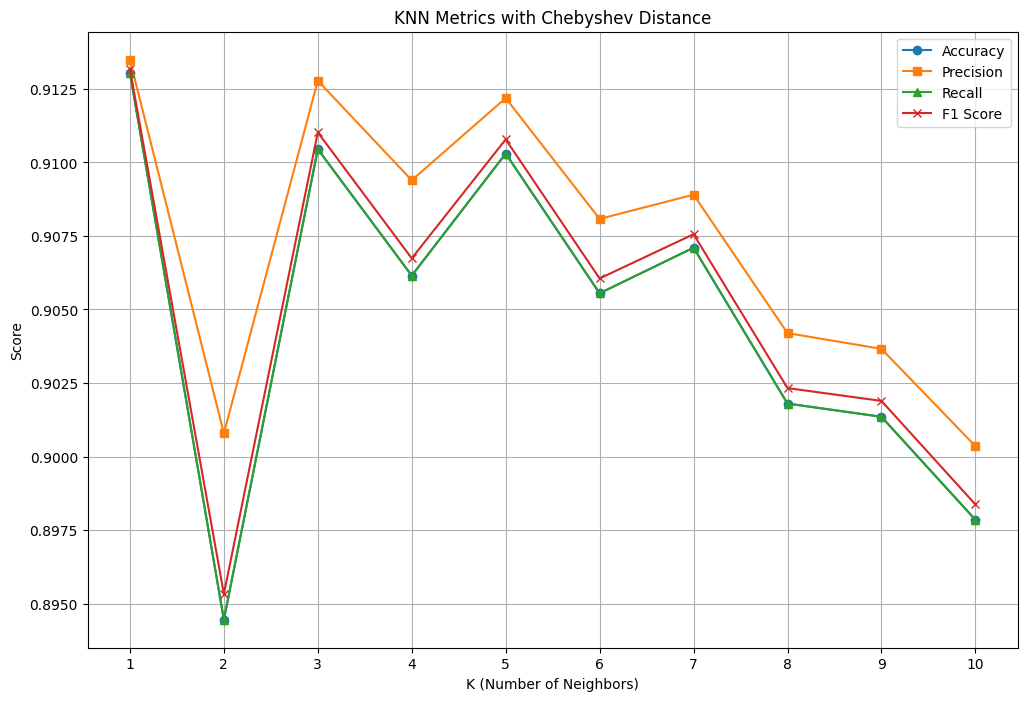

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt

# Encode target labels
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)  # Encode labels as integers

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and distance metrics to evaluate
k_values = range(1, 11)
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
results = {metric: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for metric in distance_metrics}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 5-fold cross-validation

print("\nEvaluating KNN with Cross-Validation for Different Distance Metrics:\n")

# Evaluate for each distance metric
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} distance metric:\n")
    for k in k_values:
        # Initialize the KNN classifier with the current metric
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # Perform cross-validation and get predictions
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')

        # Store the results for the current metric and k
        results[metric]['accuracy'].append(accuracy)
        results[metric]['precision'].append(precision)
        results[metric]['recall'].append(recall)
        results[metric]['f1_score'].append(f1)

        # Print the results for the current k
        print(f"K={k}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1 Score={f1:.2f}")

# Visualize the results for each metric
for metric in distance_metrics:
    plt.figure(figsize=(12, 8))
    plt.plot(k_values, results[metric]['accuracy'], marker='o', label='Accuracy')
    plt.plot(k_values, results[metric]['precision'], marker='s', label='Precision')
    plt.plot(k_values, results[metric]['recall'], marker='^', label='Recall')
    plt.plot(k_values, results[metric]['f1_score'], marker='x', label='F1 Score')
    plt.title(f"KNN Metrics with {metric.capitalize()} Distance")
    plt.xlabel("K (Number of Neighbors)")
    plt.ylabel("Score")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()


# **Results for Euclidean Distance**

Evaluating KNN with Euclidean Distance and Cross-Validation:

K=1: Accuracy=0.96
K=2: Accuracy=0.95
K=3: Accuracy=0.96
K=4: Accuracy=0.95
K=5: Accuracy=0.95
K=6: Accuracy=0.95
K=7: Accuracy=0.95
K=8: Accuracy=0.95
K=9: Accuracy=0.95
K=10: Accuracy=0.95

Best K: 1 with Accuracy=0.96


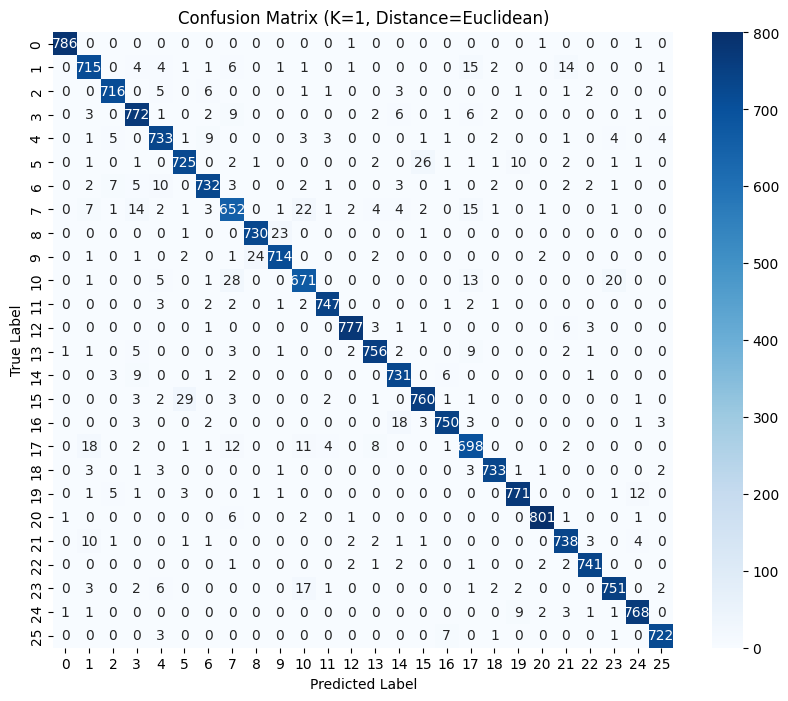


Classification Report for Best Model (Distance=Euclidean):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       0.93      0.93      0.93       766
           2       0.97      0.97      0.97       736
           3       0.94      0.96      0.95       805
           4       0.94      0.95      0.95       768
           5       0.95      0.94      0.94       775
           6       0.96      0.95      0.95       773
           7       0.89      0.89      0.89       734
           8       0.97      0.97      0.97       755
           9       0.96      0.96      0.96       747
          10       0.92      0.91      0.91       739
          11       0.98      0.98      0.98       761
          12       0.99      0.98      0.98       792
          13       0.97      0.97      0.97       783
          14       0.95      0.97      0.96       753
          15       0.96      0.95      0.95       803
          16       0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and distance metrics
k_values = range(1, 11)
distance_metric = 'euclidean'  # You can replace this or loop for other metrics if needed

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store results
accuracy_scores = []

print(f"Evaluating KNN with {distance_metric.capitalize()} Distance and Cross-Validation:\n")

# Evaluate for each k
for k in k_values:
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)

    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(knn, X, y, cv=cv)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    accuracy_scores.append(accuracy)

    # Print results for the current k
    print(f"K={k}: Accuracy={accuracy:.2f}")

# Determine the best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest K: {best_k} with Accuracy={max(accuracy_scores):.2f}")

# Train the model with the best k and evaluate
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=distance_metric)
y_pred_best = cross_val_predict(best_knn, X, y, cv=cv)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix (K={best_k}, Distance={distance_metric.capitalize()})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report for the best model
print(f"\nClassification Report for Best Model (Distance={distance_metric.capitalize()}):")
print(classification_report(y, y_pred_best))


# **Result for Manhattan Distance**

Evaluating KNN with Manhattan Distance and Cross-Validation:

K=1: Accuracy=0.95
K=2: Accuracy=0.94
K=3: Accuracy=0.95
K=4: Accuracy=0.95
K=5: Accuracy=0.95
K=6: Accuracy=0.95
K=7: Accuracy=0.95
K=8: Accuracy=0.95
K=9: Accuracy=0.95
K=10: Accuracy=0.95

Best K: 1 with Accuracy=0.95


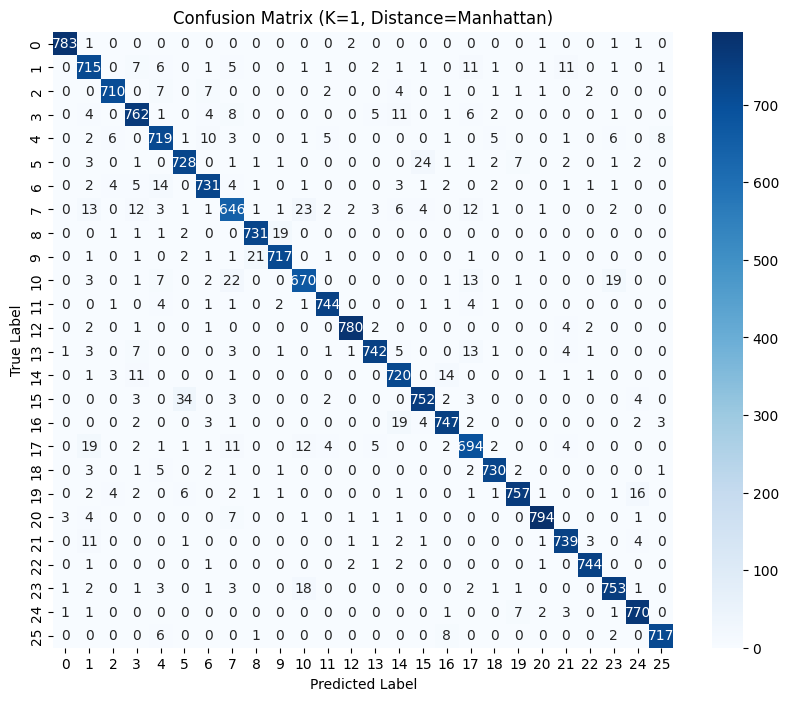


Classification Report for Best Model (Distance=Manhattan):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       789
           1       0.90      0.93      0.92       766
           2       0.97      0.96      0.97       736
           3       0.93      0.95      0.94       805
           4       0.93      0.94      0.93       768
           5       0.94      0.94      0.94       775
           6       0.95      0.95      0.95       773
           7       0.89      0.88      0.89       734
           8       0.97      0.97      0.97       755
           9       0.97      0.96      0.96       747
          10       0.92      0.91      0.91       739
          11       0.98      0.98      0.98       761
          12       0.99      0.98      0.99       792
          13       0.97      0.95      0.96       783
          14       0.93      0.96      0.94       753
          15       0.95      0.94      0.95       803
          16       0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and set distance metric to Manhattan
k_values = range(1, 11)
distance_metric = 'manhattan'

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store results
accuracy_scores = []

print(f"Evaluating KNN with {distance_metric.capitalize()} Distance and Cross-Validation:\n")

# Evaluate for each k
for k in k_values:
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)

    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(knn, X, y, cv=cv)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    accuracy_scores.append(accuracy)

    # Print results for the current k
    print(f"K={k}: Accuracy={accuracy:.2f}")

# Determine the best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest K: {best_k} with Accuracy={max(accuracy_scores):.2f}")

# Train the model with the best k and evaluate
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=distance_metric)
y_pred_best = cross_val_predict(best_knn, X, y, cv=cv)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix (K={best_k}, Distance={distance_metric.capitalize()})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report for the best model
print(f"\nClassification Report for Best Model (Distance={distance_metric.capitalize()}):")
print(classification_report(y, y_pred_best))


# **Result for Chebyshev Distance**

Evaluating KNN with Chebyshev Distance and Cross-Validation:

K=1: Accuracy=0.91
K=2: Accuracy=0.89
K=3: Accuracy=0.90
K=4: Accuracy=0.90
K=5: Accuracy=0.90
K=6: Accuracy=0.90
K=7: Accuracy=0.90
K=8: Accuracy=0.89
K=9: Accuracy=0.89
K=10: Accuracy=0.89

Best K: 1 with Accuracy=0.91


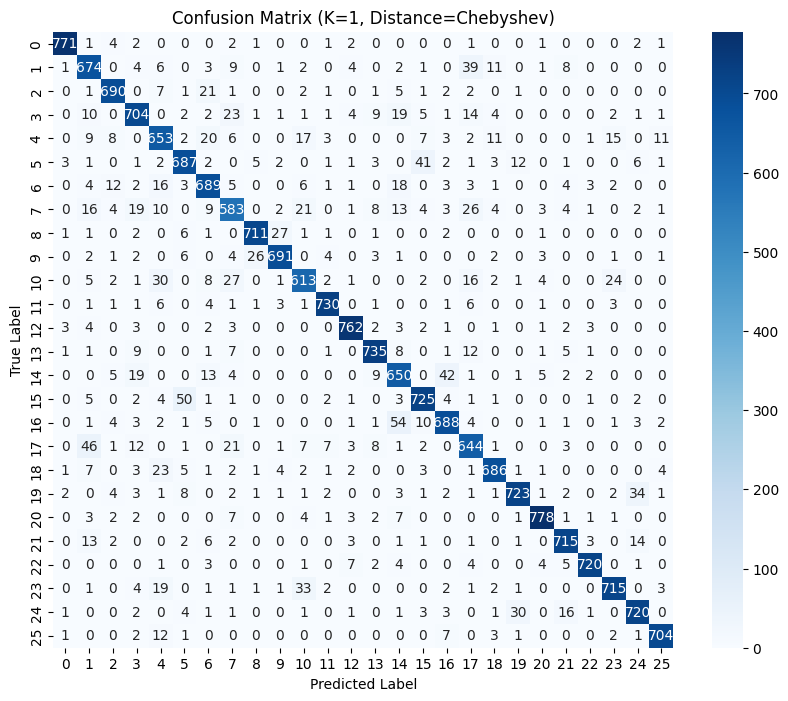


Classification Report for Best Model (Distance=Chebyshev):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       789
           1       0.84      0.88      0.86       766
           2       0.93      0.94      0.93       736
           3       0.88      0.87      0.88       805
           4       0.82      0.85      0.84       768
           5       0.88      0.89      0.88       775
           6       0.87      0.89      0.88       773
           7       0.82      0.79      0.81       734
           8       0.95      0.94      0.95       755
           9       0.94      0.93      0.93       747
          10       0.86      0.83      0.84       739
          11       0.96      0.96      0.96       761
          12       0.96      0.96      0.96       792
          13       0.94      0.94      0.94       783
          14       0.82      0.86      0.84       753
          15       0.90      0.90      0.90       803
          16       0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and set distance metric to Chebyshev
k_values = range(1, 11)
distance_metric = 'chebyshev'

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
accuracy_scores = []

print(f"Evaluating KNN with {distance_metric.capitalize()} Distance and Cross-Validation:\n")

# Evaluate for each k
for k in k_values:
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)

    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(knn, X, y, cv=cv)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    accuracy_scores.append(accuracy)

    # Print results for the current k
    print(f"K={k}: Accuracy={accuracy:.2f}")

# Determine the best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest K: {best_k} with Accuracy={max(accuracy_scores):.2f}")

# Train the model with the best k and evaluate
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=distance_metric)
y_pred_best = cross_val_predict(best_knn, X, y, cv=cv)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix (K={best_k}, Distance={distance_metric.capitalize()})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report for the best model
print(f"\nClassification Report for Best Model (Distance={distance_metric.capitalize()}):")
print(classification_report(y, y_pred_best))



Evaluating KNN with Cross-Validation for Different Distance Metrics:


Evaluating KNN with Euclidean distance metric:

K=1: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=3: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=5: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=7: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=9: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96

Evaluating KNN with Manhattan distance metric:

K=1: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=3: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=5: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=7: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=9: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96

Evaluating KNN with Chebyshev distance metric:

K=1: Accuracy=0.91, Precision=0.91, Recall=0.91, F1 Score=0.91
K=3: Accuracy=0.92, Precision=0.92, Recall=0.92, F1 Score=0.92
K=5: Accuracy=0.92, Precis

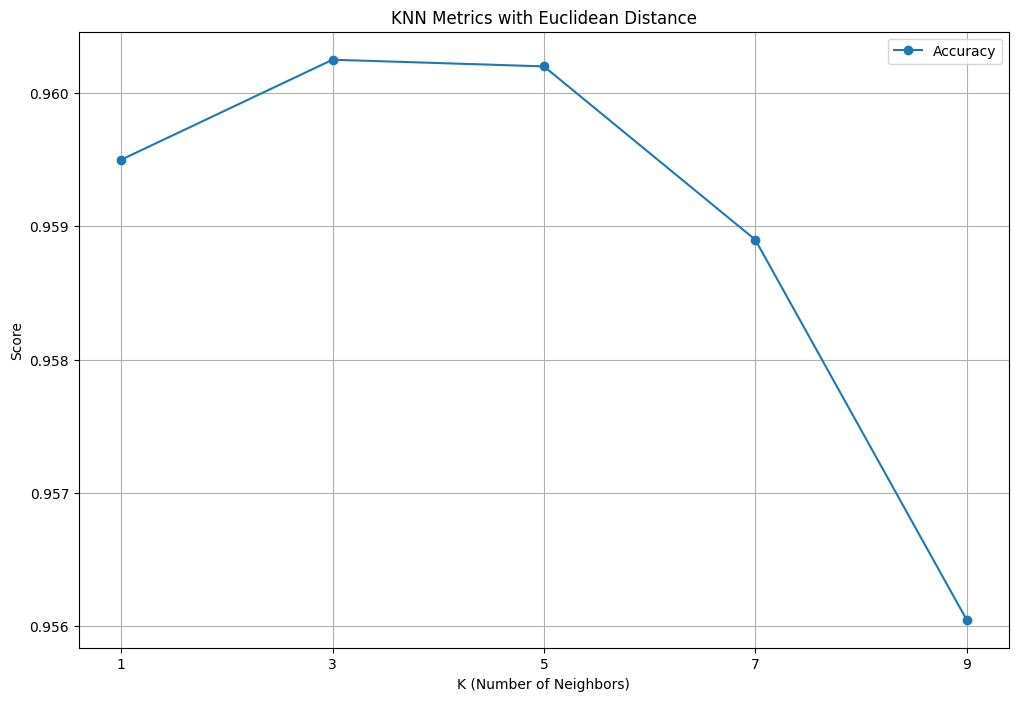

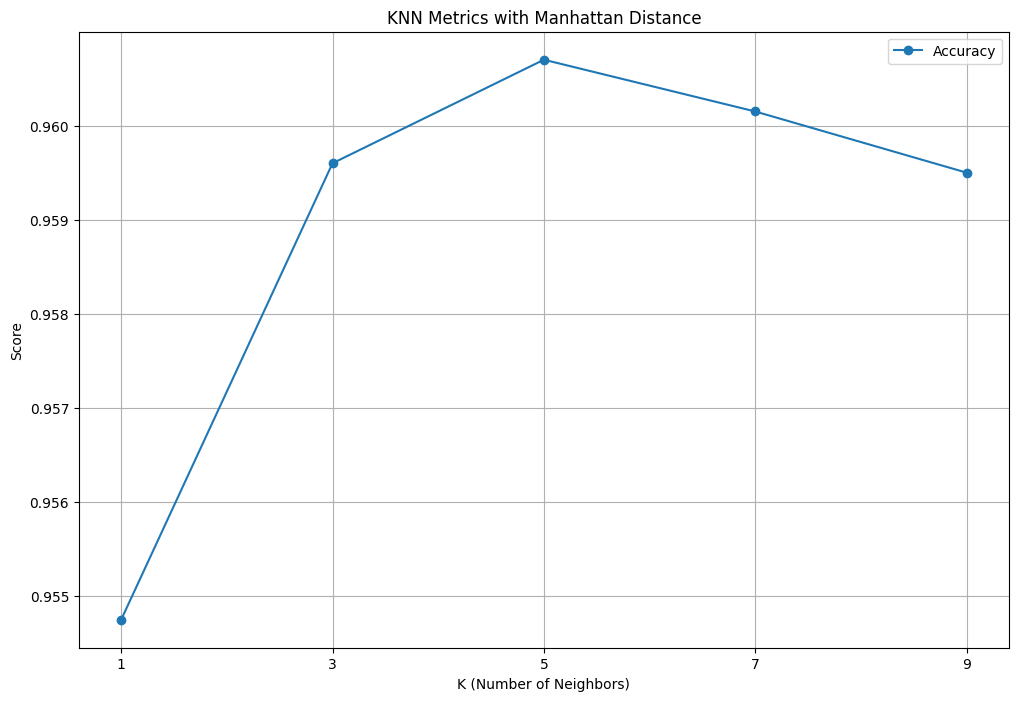

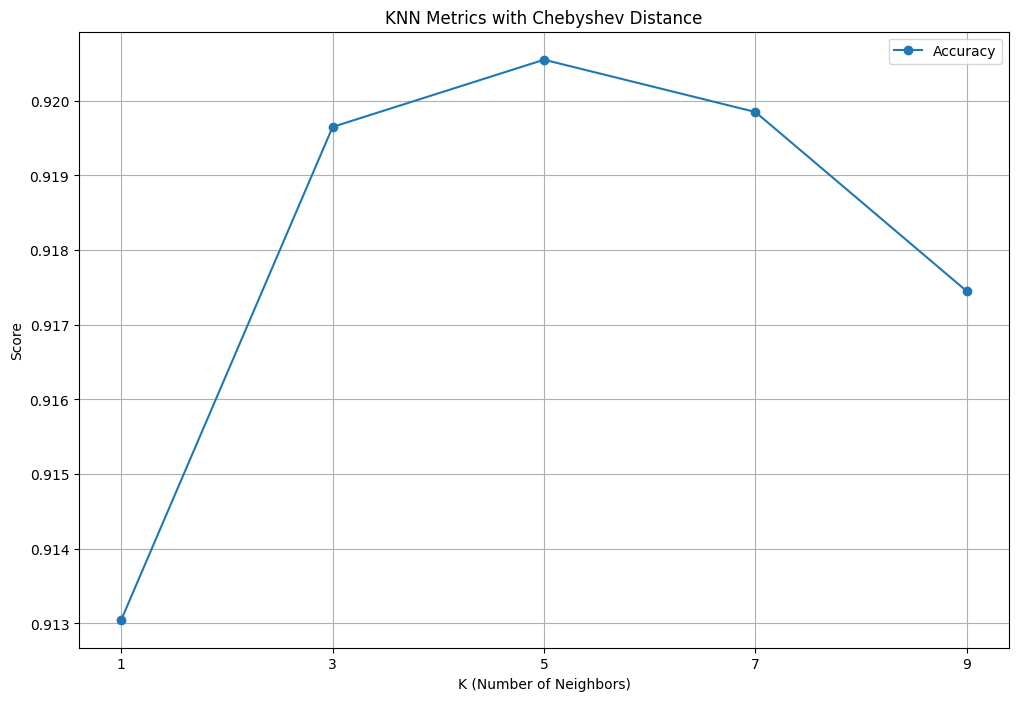


Best K for Euclidean Distance: K=3 with Accuracy=0.96

Best K for Manhattan Distance: K=5 with Accuracy=0.96

Best K for Chebyshev Distance: K=5 with Accuracy=0.92


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define a wider range of K values
k_values = range(1, 11,2)  # Explore a wider range of K
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

results = {metric: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for metric in distance_metrics}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 5-fold cross-validation

print("\nEvaluating KNN with Cross-Validation for Different Distance Metrics:\n")

# Evaluate for each distance metric
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} distance metric:\n")
    for k in k_values:
        # Initialize the KNN classifier with the current metric and weights='distance'
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')

        # Perform cross-validation and get predictions
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')

        # Store the results for the current metric and k
        results[metric]['accuracy'].append(accuracy)
        results[metric]['precision'].append(precision)
        results[metric]['recall'].append(recall)
        results[metric]['f1_score'].append(f1)

        # Print the results for the current k
        print(f"K={k}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1 Score={f1:.2f}")

# Visualize the results for each metric
for metric in distance_metrics:
    plt.figure(figsize=(12, 8))
    plt.plot(k_values, results[metric]['accuracy'], marker='o', label='Accuracy')

    plt.title(f"KNN Metrics with {metric.capitalize()} Distance")
    plt.xlabel("K (Number of Neighbors)")
    plt.ylabel("Score")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

# Find the best results
best_results = {}
for metric in distance_metrics:
    best_k = k_values[np.argmax(results[metric]['accuracy'])]
    best_accuracy = max(results[metric]['accuracy'])
    best_results[metric] = {'best_k': best_k, 'best_accuracy': best_accuracy}
    print(f"\nBest K for {metric.capitalize()} Distance: K={best_k} with Accuracy={best_accuracy:.2f}")


# **#   Here The Above is the best result of all the K Values in Euclidean Distances**

# **After This There Are the Reuslts, Accuracy and Confusion Matrix for Seperate Each One**


Evaluating KNN with Cross-Validation for Euclidean Distance Metric:


Evaluating KNN with Euclidean distance metric:

K=1: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=3: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=5: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=7: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=9: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96

Best K for Euclidean Distance: K=3 with Accuracy=0.96


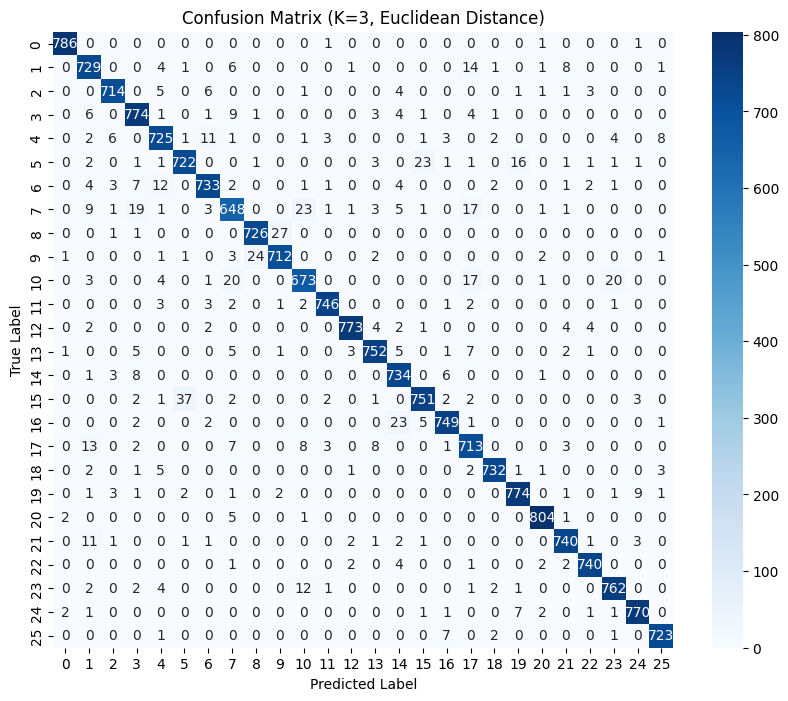

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and Euclidean distance
k_values = range(1, 11,2)  # K values from 1 to 10
distance_metrics = ['euclidean']

results = {metric: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for metric in distance_metrics}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

print("\nEvaluating KNN with Cross-Validation for Euclidean Distance Metric:\n")

# Evaluate for Euclidean distance
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} distance metric:\n")
    for k in k_values:
        # Initialize the KNN classifier with the current metric and weights='distance'
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')

        # Perform cross-validation and get predictions
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')

        # Store the results for the current metric and k
        results[metric]['accuracy'].append(accuracy)
        results[metric]['precision'].append(precision)
        results[metric]['recall'].append(recall)
        results[metric]['f1_score'].append(f1)

        # Print the results for the current k
        print(f"K={k}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1 Score={f1:.2f}")

# Find the best K and corresponding results
best_k = k_values[np.argmax(results['euclidean']['accuracy'])]
best_accuracy = max(results['euclidean']['accuracy'])
print(f"\nBest K for Euclidean Distance: K={best_k} with Accuracy={best_accuracy:.2f}")

# Train the model with the best k and evaluate
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='distance')
y_pred_best = cross_val_predict(best_knn, X, y, cv=cv)

# Confusion matrix for the best k
conf_matrix = confusion_matrix(y, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix (K={best_k}, Euclidean Distance)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Evaluating KNN with Cross-Validation for Manhattan Distance Metric:


Evaluating KNN with Manhattan distance metric:

K=1: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=3: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=5: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=7: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=9: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96

Best K for Manhattan Distance: K=5 with Accuracy=0.96


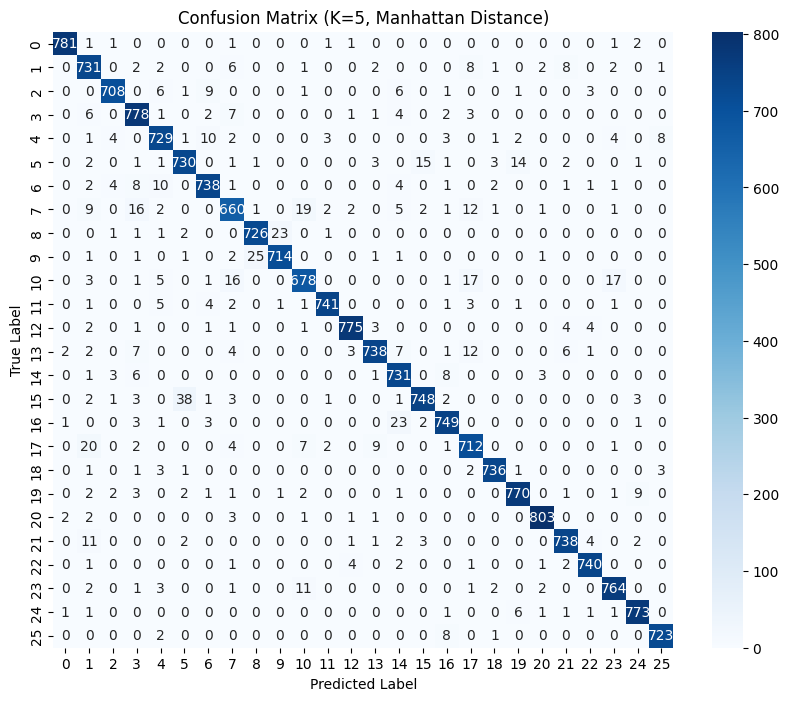

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and Euclidean distance
k_values = range(1, 11,2)  # K values from 1 to 10
distance_metrics = ['manhattan']

results = {metric: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for metric in distance_metrics}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

print("\nEvaluating KNN with Cross-Validation for Manhattan Distance Metric:\n")

# Evaluate for Euclidean distance
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} distance metric:\n")
    for k in k_values:
        # Initialize the KNN classifier with the current metric and weights='distance'
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')

        # Perform cross-validation and get predictions
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')

        # Store the results for the current metric and k
        results[metric]['accuracy'].append(accuracy)
        results[metric]['precision'].append(precision)
        results[metric]['recall'].append(recall)
        results[metric]['f1_score'].append(f1)

        # Print the results for the current k
        print(f"K={k}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1 Score={f1:.2f}")

# Find the best K and corresponding results
best_k = k_values[np.argmax(results['manhattan']['accuracy'])]
best_accuracy = max(results['manhattan']['accuracy'])
print(f"\nBest K for Manhattan Distance: K={best_k} with Accuracy={best_accuracy:.2f}")

# Train the model with the best k and evaluate
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan', weights='distance')
y_pred_best = cross_val_predict(best_knn, X, y, cv=cv)

# Confusion matrix for the best k
conf_matrix = confusion_matrix(y, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix (K={best_k}, Manhattan Distance)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Evaluating KNN with Cross-Validation for chebyshev Distance Accuracy & Metric:


Evaluating KNN with Chebyshev distance metric:

K=1: Accuracy=0.91, Precision=0.91, Recall=0.91, F1 Score=0.91
K=3: Accuracy=0.92, Precision=0.92, Recall=0.92, F1 Score=0.92
K=5: Accuracy=0.92, Precision=0.92, Recall=0.92, F1 Score=0.92
K=7: Accuracy=0.92, Precision=0.92, Recall=0.92, F1 Score=0.92
K=9: Accuracy=0.92, Precision=0.92, Recall=0.92, F1 Score=0.92

Best K for chebyshev Distance: K=5 with Accuracy=0.92


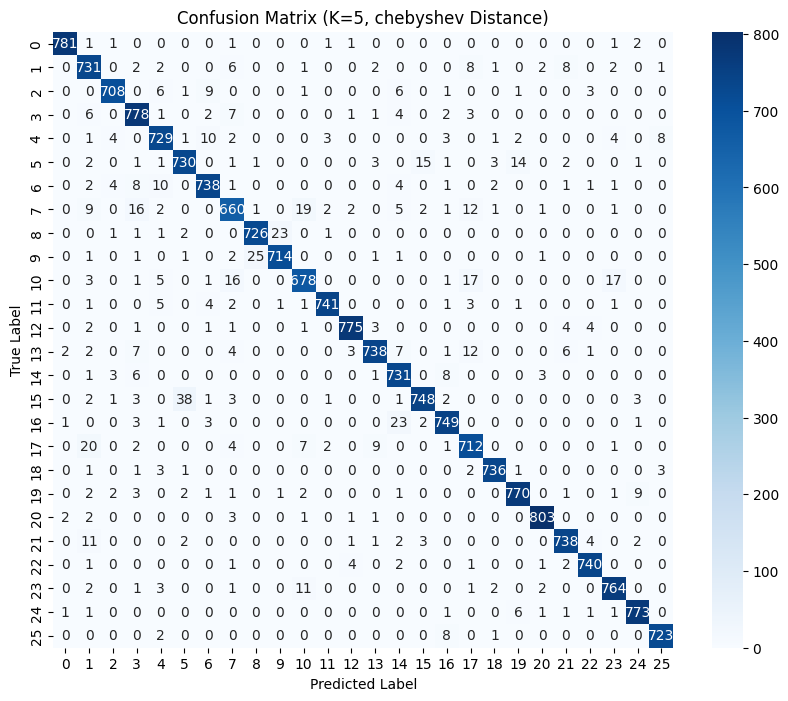

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and Euclidean distance
k_values = range(1, 11,2)  # K values from 1 to 10
distance_metrics = ['chebyshev']

results = {metric: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for metric in distance_metrics}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

print("\nEvaluating KNN with Cross-Validation for chebyshev Distance Accuracy & Metric:\n")

# Evaluate for Euclidean distance
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} distance metric:\n")
    for k in k_values:
        # Initialize the KNN classifier with the current metric and weights='distance'
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')

        # Perform cross-validation and get predictions
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')

        # Store the results for the current metric and k
        results[metric]['accuracy'].append(accuracy)
        results[metric]['precision'].append(precision)
        results[metric]['recall'].append(recall)
        results[metric]['f1_score'].append(f1)

        # Print the results for the current k
        print(f"K={k}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1 Score={f1:.2f}")

# Find the best K and corresponding results
best_k = k_values[np.argmax(results['chebyshev']['accuracy'])]
best_accuracy = max(results['chebyshev']['accuracy'])
print(f"\nBest K for chebyshev Distance: K={best_k} with Accuracy={best_accuracy:.2f}")

# Train the model with the best k and evaluate
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan', weights='distance')
y_pred_best = cross_val_predict(best_knn, X, y, cv=cv)

# Confusion matrix for the best k
conf_matrix = confusion_matrix(y, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix (K={best_k}, chebyshev Distance)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **This is the End of the Assignment**


Evaluating KNN with Cross-Validation for Different Distance Metrics (Accuracy Only):


Evaluating KNN with Euclidean distance metric:

K=1: CV Accuracy=0.96
K=2: CV Accuracy=0.95
K=3: CV Accuracy=0.96
K=4: CV Accuracy=0.95
K=5: CV Accuracy=0.95
K=6: CV Accuracy=0.95
K=7: CV Accuracy=0.95
K=8: CV Accuracy=0.95
K=9: CV Accuracy=0.95
K=10: CV Accuracy=0.95

Best K for Euclidean Distance: K=1 with CV Accuracy=0.96


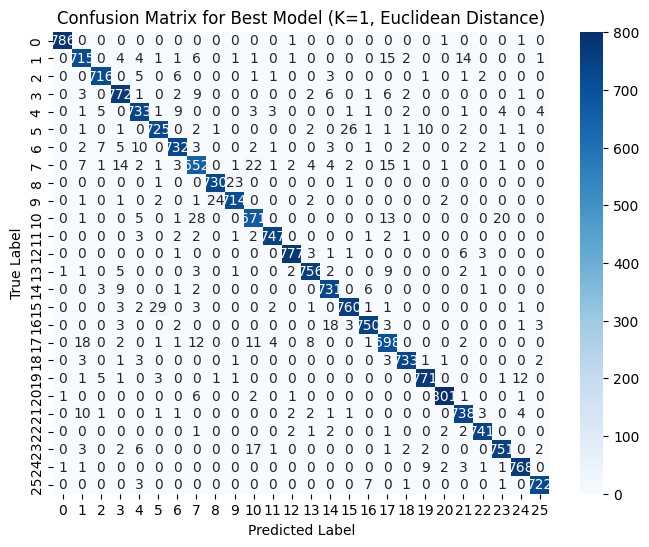


Evaluating KNN with Manhattan distance metric:

K=1: CV Accuracy=0.95
K=2: CV Accuracy=0.94
K=3: CV Accuracy=0.95
K=4: CV Accuracy=0.95
K=5: CV Accuracy=0.95
K=6: CV Accuracy=0.95
K=7: CV Accuracy=0.95
K=8: CV Accuracy=0.95
K=9: CV Accuracy=0.95
K=10: CV Accuracy=0.95

Best K for Manhattan Distance: K=1 with CV Accuracy=0.95


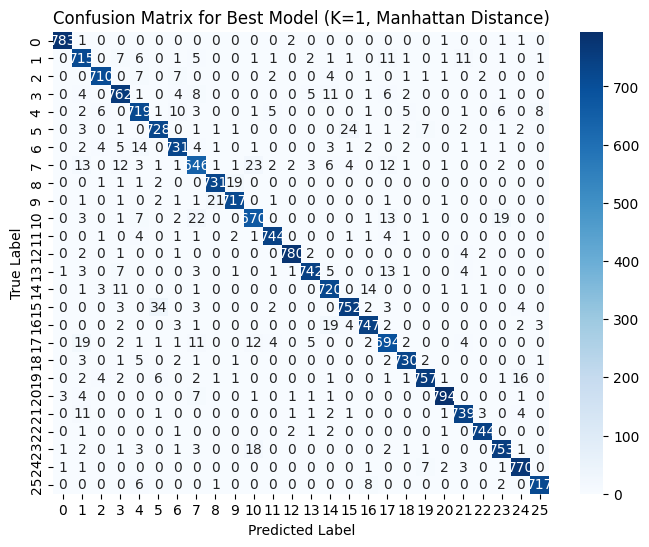


Evaluating KNN with Chebyshev distance metric:

K=1: CV Accuracy=0.91
K=2: CV Accuracy=0.89
K=3: CV Accuracy=0.91
K=4: CV Accuracy=0.91
K=5: CV Accuracy=0.91
K=6: CV Accuracy=0.91
K=7: CV Accuracy=0.91
K=8: CV Accuracy=0.90
K=9: CV Accuracy=0.90
K=10: CV Accuracy=0.90

Best K for Chebyshev Distance: K=1 with CV Accuracy=0.91


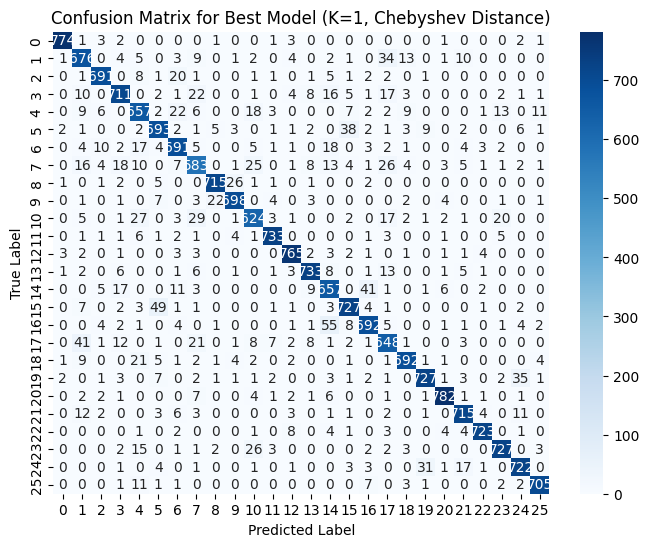

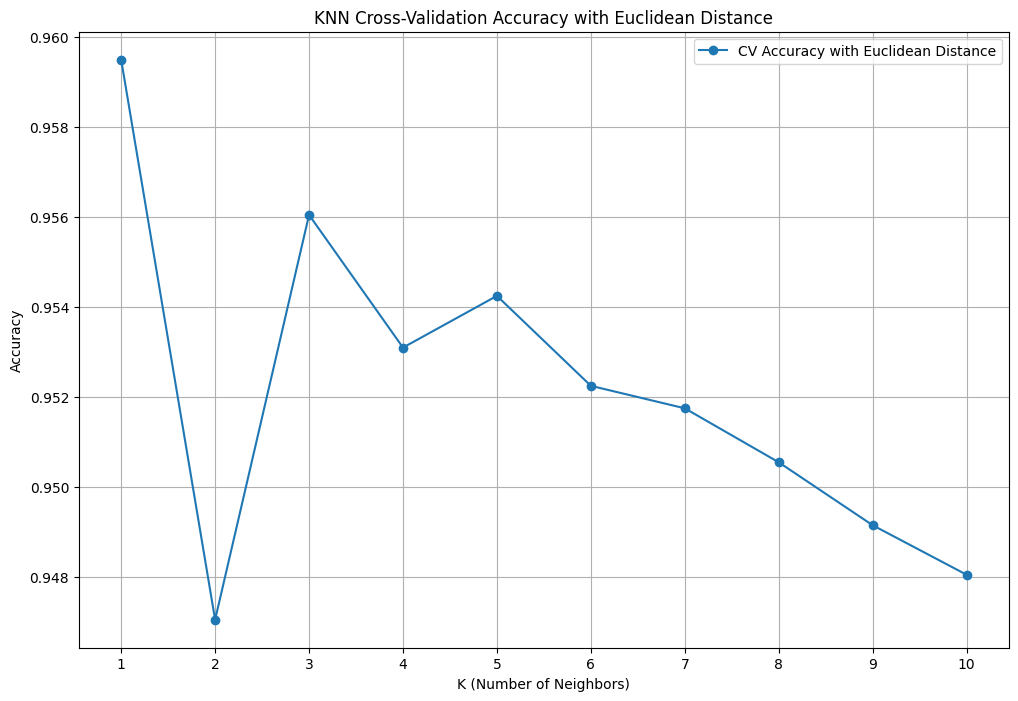

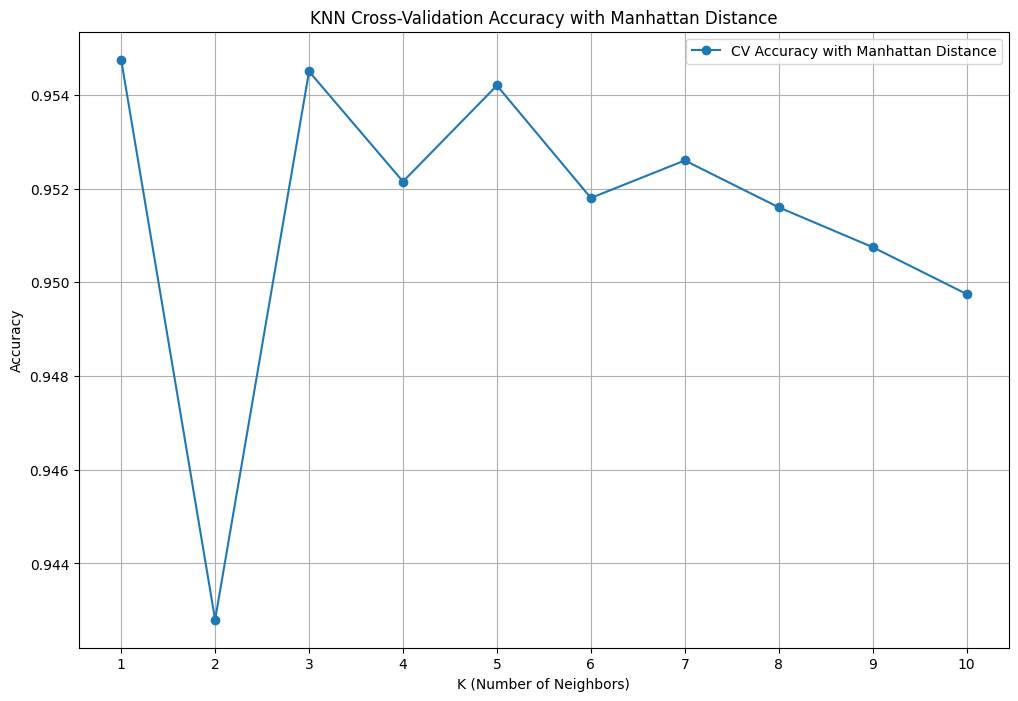

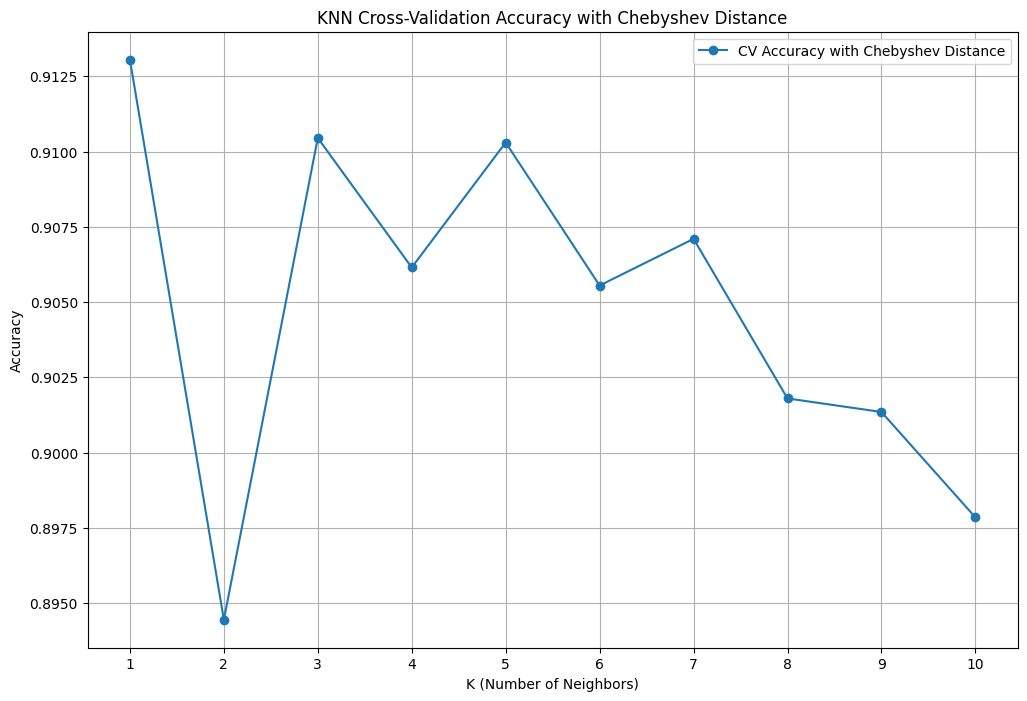

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and distance metrics to evaluate
k_values = range(1, 11)
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
accuracy_results = {metric: [] for metric in distance_metrics}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

print("\nEvaluating KNN with Cross-Validation for Different Distance Metrics (Accuracy Only):\n")

# Evaluate for each distance metric
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} distance metric:\n")

    # Lists to store results for cross-validation accuracy
    cv_accuracies = []

    for k in k_values:
        # Initialize the KNN classifier with the current metric
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # Perform cross-validation and get predictions
        y_pred_cv = cross_val_predict(knn, X, y, cv=cv)

        # Calculate cross-validation accuracy
        cv_accuracy = accuracy_score(y, y_pred_cv)
        cv_accuracies.append(cv_accuracy)

        # Store the cross-validation accuracy result for the current metric and k
        accuracy_results[metric].append(cv_accuracy)

        # Print the result for the current k (cross-validation accuracy)
        print(f"K={k}: CV Accuracy={cv_accuracy:.2f}")

    # Find the best k based on cross-validation accuracy
    best_k = k_values[np.argmax(cv_accuracies)]  # Best k based on cross-validation accuracy
    print(f"\nBest K for {metric.capitalize()} Distance: K={best_k} with CV Accuracy={max(cv_accuracies):.2f}")

    # Confusion Matrix for the best model
    best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    y_pred_best = cross_val_predict(best_knn, X, y, cv=cv)

    # Confusion matrix for the best K and metric
    conf_matrix = confusion_matrix(y, y_pred_best)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for Best Model (K={best_k}, {metric.capitalize()} Distance)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Visualize the accuracy results for each metric (cross-validation accuracy)
for metric in distance_metrics:
    plt.figure(figsize=(12, 8))
    plt.plot(k_values, accuracy_results[metric], marker='o', label=f'CV Accuracy with {metric.capitalize()} Distance')
    plt.title(f"KNN Cross-Validation Accuracy with {metric.capitalize()} Distance")
    plt.xlabel("K (Number of Neighbors)")
    plt.ylabel("Accuracy")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()



Evaluating KNN with Cross-Validation for chebyshev Distance Accuracy & Metric:


Evaluating KNN with Chebyshev distance metric:

K=1: Accuracy=0.91, Precision=0.91, Recall=0.91, F1 Score=0.91
K=3: Accuracy=0.92, Precision=0.92, Recall=0.92, F1 Score=0.92
K=5: Accuracy=0.92, Precision=0.92, Recall=0.92, F1 Score=0.92
K=7: Accuracy=0.92, Precision=0.92, Recall=0.92, F1 Score=0.92
K=9: Accuracy=0.92, Precision=0.92, Recall=0.92, F1 Score=0.92

Best K for chebyshev Distance: K=5 with Accuracy=0.92


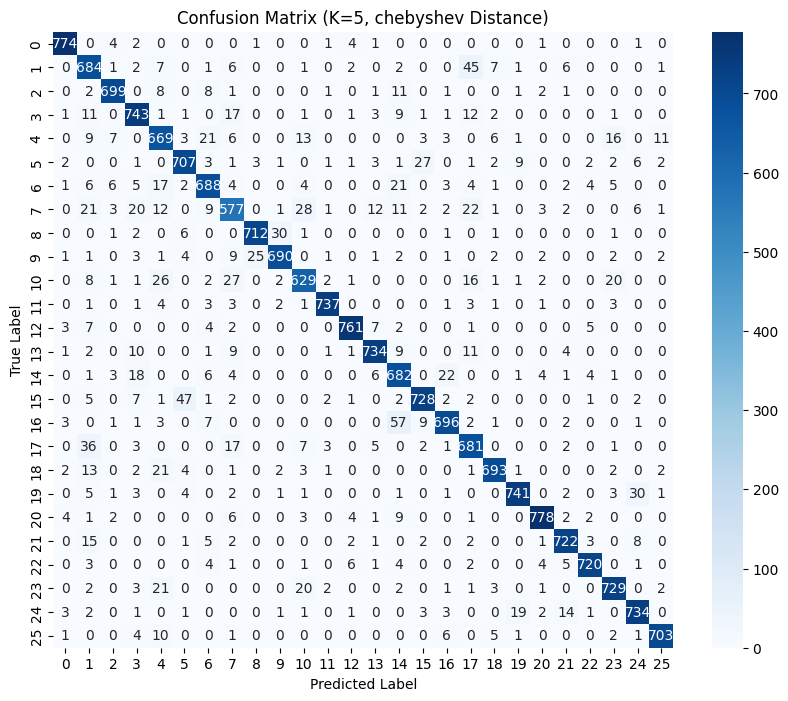


Classification Report for Best Model (Distance=Chebyshev):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       789
           1       0.82      0.89      0.85       766
           2       0.96      0.95      0.95       736
           3       0.89      0.92      0.91       805
           4       0.84      0.87      0.85       768
           5       0.91      0.91      0.91       775
           6       0.90      0.89      0.90       773
           7       0.83      0.79      0.81       734
           8       0.96      0.94      0.95       755
           9       0.95      0.92      0.93       747
          10       0.88      0.85      0.87       739
          11       0.98      0.97      0.97       761
          12       0.97      0.96      0.97       792
          13       0.95      0.94      0.94       783
          14       0.83      0.91      0.86       753
          15       0.94      0.91      0.92       803
          16       0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and Euclidean distance
k_values = range(1, 11,2)  # K values from 1 to 10
distance_metrics = ['chebyshev']

results = {metric: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for metric in distance_metrics}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

print("\nEvaluating KNN with Cross-Validation for chebyshev Distance Accuracy & Metric:\n")

# Evaluate for Euclidean distance
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} distance metric:\n")
    for k in k_values:
        # Initialize the KNN classifier with the current metric and weights='distance'
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')

        # Perform cross-validation and get predictions
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')

        # Store the results for the current metric and k
        results[metric]['accuracy'].append(accuracy)
        results[metric]['precision'].append(precision)
        results[metric]['recall'].append(recall)
        results[metric]['f1_score'].append(f1)

        # Print the results for the current k
        print(f"K={k}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1 Score={f1:.2f}")

# Find the best K and corresponding results
best_k = k_values[np.argmax(results['chebyshev']['accuracy'])]
best_accuracy = max(results['chebyshev']['accuracy'])
print(f"\nBest K for chebyshev Distance: K={best_k} with Accuracy={best_accuracy:.2f}")

# Train the model with the best k and evaluate
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='chebyshev', weights='distance') # Changed from 'manhattan' to 'chebyshev'
y_pred_best = cross_val_predict(best_knn, X, y, cv=cv)

# Confusion matrix for the best k
conf_matrix = confusion_matrix(y, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix (K={best_k}, chebyshev Distance)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report for the best model
print(f"\nClassification Report for Best Model (Distance={metric.capitalize()}):") # Changed 'distance_metric' to 'metric'
print(classification_report(y, y_pred_best))